## Task-1a. Model to predict if a candidate will attend an intervew ##

## Project Abstract ##


The company, Acme Co., sources candidates for companies hiring new employees. Recently, a number of our clients have complained that candidates have not been showing up to interviews. The leadership has provided with a dataset in hopes that I can find some way of identifying candidates at risk of not attending scheduled interviews. Using the data, the goal of this case study is to explore different machine learning techniques to predict the observed attendance for the company which can help the recruiting team and also deploy an optimized model in a Production environment that can benefit the recruitment department on new hires/recruitment drives. The research uses a simulated dataset similar to the real world dataset with a total of 22 features to conduct this analysis and identify an optimized model that can predict the observed attendance which can then be utilized by the organization to make informed decision.

This case study demonstrates a preliminary work to build a base model that can predict the observed attendance and optimize it based on initial observations to create a final model that can be implemented by utilizing the candidate information. The final model will offer actionable insights and enable the company to make informed decision on future recruitment efforts.

For prediction, the case study will explore Supervised learning methods mainly because the dataset available is labeled. In Supervised learning, different classification techniques will be explored like LogisticRegression classifier, Naive Bayes classifier, Decision Tree classifier, an ensemble method (Random Forest), KNN classifier etc. The results will be evaluated on accuracy, F1 and roc-auc scores. 

## Data Description ##

The objective of this case study is to predict the observed attendance of interviewees. The case study explores different classification models for such a setting to predict the observed attendance using a set of features given the basic assumption that the examples are independent and identically distributed. The target variable has distinct classes and it is important to compare the performance of different machine learning algorithms consistently.

The interview history dataset contains 1233 records with 22 attributes. The dataset contains information about the candidate's demographic information, position applied for, skill set, type of interview, personal information and other relevant candidate interview questionaire. The target variable appears to have missing values and so are some of the attributes in the datasets. The determination to impute missing values using an appropriate imputation startegy will be made during the data pre-processing phase. The datasets contains only categorical variables and there is a need to develop encoding strategy to transform the categorical attributes before model building. Based on the initial review of the dataset some of the attributes seem to have overlapping relationship with other attributes in the dataset and need to be studied further using correlation analysis. There are few attributes like the Date of interview, Candidate ID etc. that seem to have low significance to model training and evaluation because they are more informational and do not explain variability, such attributes should be reviewed and dropped if they are not needed during the data pre-processing phase. 

Considering the minimal size of the dataset, it would be a reasonable assumption to evaluate different models using full data and based on the outcome I will determine the optimal model that can be operationalized. First steps would be cleaning and pre-processing of the data before training the model and the initial training/evaluation would be done using basic parameter setting and upon observing the outcome of this initial model, it would be ideal to conduct further experimentation to tune the hyper-parameters if the required accuracy is not achieved through any of the models and if needed engineer additional features from the provided input data to improve the accuracy of the final model.

## Model Pipeline ##

Here is a visual representation of the perceived model pipeline including the different phases of data preparation and data analysis. The visualization provides a brief description of the sub-tasks that should be conducted in each of the individual phases leading up to operationalization of the final optimized model in Production. The visualization serves as a blue print for the forthcoming sections.

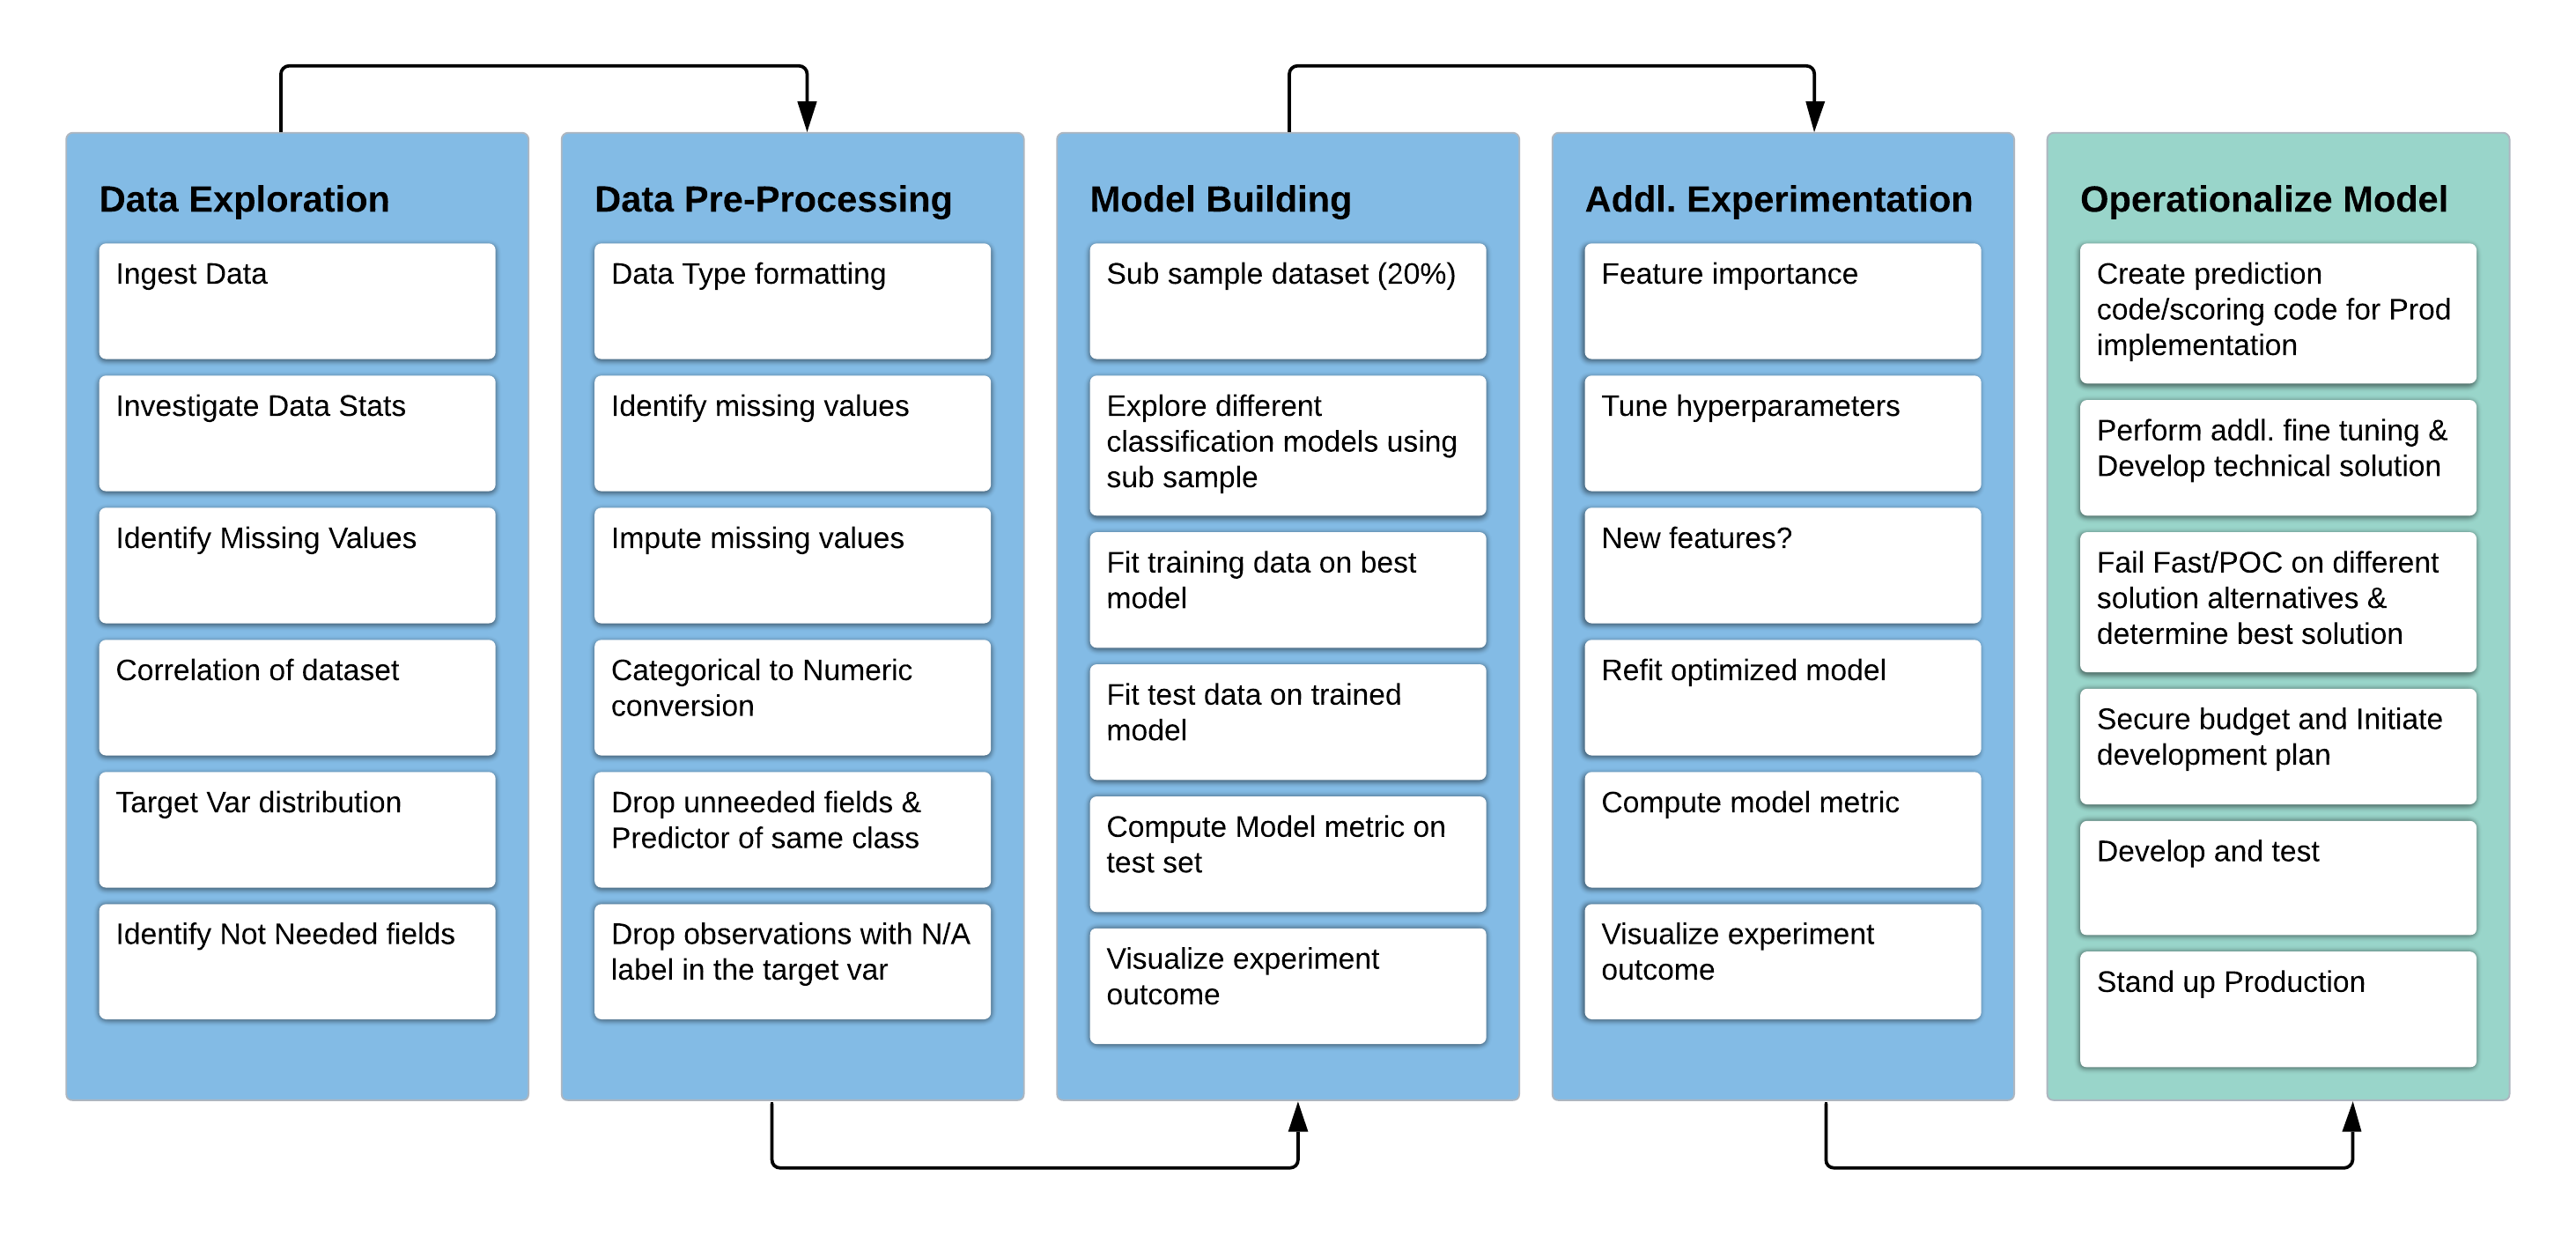

In [831]:
from IPython.display import Image
Image(filename='/users/kousik/data-scientist-v3/model_pipeline.png')

## Data Load ##

The first step to the modeling process is to ingest the interview dataset that is available as csv file in the working directory using a well known pandas function in Python. 

In [8]:
import os
import time
import gc
import warnings
warnings.filterwarnings("ignore")
# data manipulation
import numpy as np
import pandas as pd
# plot
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
# model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
import time
from sklearn.metrics import accuracy_score
interview_df = pd.read_csv('/users/kousik/data-scientist-v3/Interview_Attendance_Data.csv')
print("Shape of the dataset: ",interview_df.shape)

Shape of the dataset:  (1234, 22)


## Data Exploration ##

The Exploratory Data Analysis (EDA) will include both univariate and bivariate analyses. The exploratory data analysis would enable a ML engineer to visualize and make sense of different distributions that are illustrated by the features or attributes on the dataset. A bivariate analysis represents the relationship between two variables and permits the researcher to see at a glance the degree and pattern of relation between the different predictor variables and the target attribute and perform deeper analysis. It is very important to analyze how the independent variables impact the target variable and affect the accuracy of the model. As part of this case study, visual analytics on the dataset was conducted and meaningful insights were derived from the dataset. The data will be visualized using graphs, plots and bars because the visual medium helps in researching the entire dataset without having to manually investigate for individual anomalies, understand the data better and also the relationships between the variables. The visualization will help decide what type of models would explain the data better.

### Preliminary Data Statistics ###

In [9]:
interview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 22 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1234 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Name(Cand ID)                   

Following are some of the important data metrics extracted from the dataset that are interesting to me.

    # Total observations in interview dataset       - 1233
    # Total count of missing in column 14           - 204
    # Total count of missing in column 15           - 247
    # Total count of missing in column 16           - 247
    # Total count of missing in column 17           - 247
    # Total count of missing in column 18           - 248
    # Total count of missing in column 19           - 248
    # Total count of missing in column 20           - 245
    # Total count of missing in column 21           - 93

### Target Variable (Class) Frequency ###

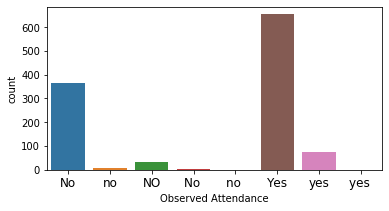

In [61]:
plt.figure(figsize=(6,3))
sns.countplot(interview_df['Observed Attendance'])
plt.xticks(fontsize=12)
plt.show()

#### Target Variable Ratio (ignoring case) ####

In [43]:
total_yes = interview_df.loc[interview_df['Observed Attendance'].str.lower() == 'yes'].shape[0]
total_no = interview_df.loc[interview_df['Observed Attendance'].str.lower() == 'no'].shape[0]
percent_of_yes = total_yes/interview_df.shape[0]
percent_of_no = total_no/interview_df.shape[0]
print("Target Variable Ratio for 'yes':", percent_of_yes)
print("Target Variable Ratio for 'no':", percent_of_no)

Target Variable Ratio for 'yes': 0.5899513776337115
Target Variable Ratio for 'no': 0.32820097244732577


In [148]:
def plot_categorical(data, col, size=[4 ,2], xlabel_angle=0, title='', max_cat = None):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts() / len(data)
    if max_cat != None:
        plotdata = plotdata[max_cat[0]:max_cat[1]]
    plt.figure(figsize = size)
    sns.barplot(x = plotdata.index, y=plotdata.values)
    plt.title(title)
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    plt.show()
    
def plot_categorical_ax(data, fig, axs, col, size=[4 ,2], xlabel_angle=0, title='', max_cat = None,i = 0,j = 0):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts() / len(data)
    if max_cat != None:
        plotdata = plotdata[max_cat[0]:max_cat[1]]
    sns.barplot(x = plotdata.index, y=plotdata.values,ax=axs[i][j])
    axs[i][j].set_title(title)
    if xlabel_angle!=0: 
        axs[i][j].tick_params(rotation=xlabel_angle)


### Industry Distribution ###

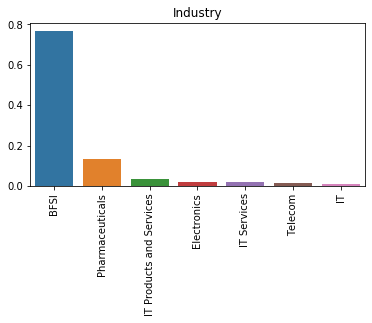

In [149]:
plot_categorical(data=interview_df, col='Industry', size=[6 ,3], xlabel_angle=90, title='Industry', max_cat=[0, 10])

### Location Distributions ###

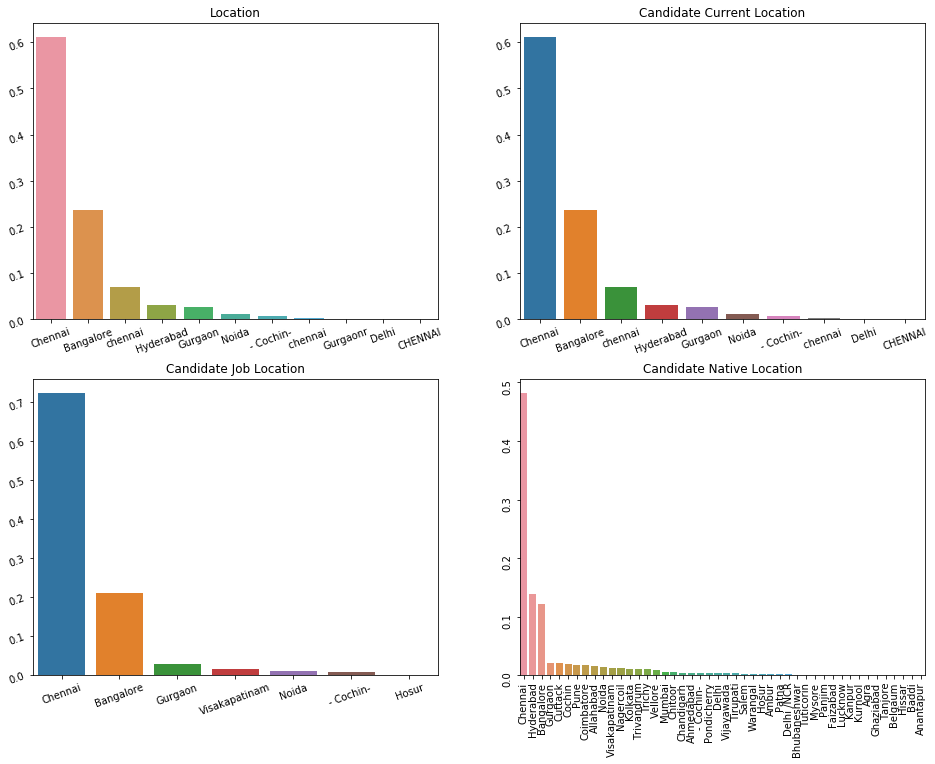

In [153]:
fig, axs = plt.subplots(2,2,figsize=(16,12))
plot_categorical_ax(data=interview_df, fig=fig, axs=axs, col='Location', size=[6 ,3], xlabel_angle=20, title='Location',i = 0,j = 0)
plot_categorical_ax(data=interview_df, fig=fig, axs=axs, col='Candidate Current Location', size=[6 ,3], xlabel_angle=20, title='Candidate Current Location',i = 0,j = 1)
plot_categorical_ax(data=interview_df, fig=fig, axs=axs, col='Candidate Job Location', size=[6 ,3], xlabel_angle=20, title='Candidate Job Location',i = 1,j = 0)
plot_categorical_ax(data=interview_df, fig=fig, axs=axs, col='Candidate Native location', size=[6 ,3], xlabel_angle=90, title='Candidate Native Location',i = 1,j = 1)

plt.show()

### Gender Distribution ###

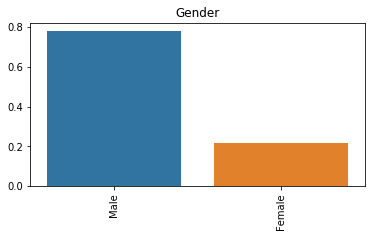

In [54]:
plot_categorical(data=interview_df, col='Gender', size=[6 ,3], xlabel_angle=90, title='Gender')

### Interview Type Distribution ###

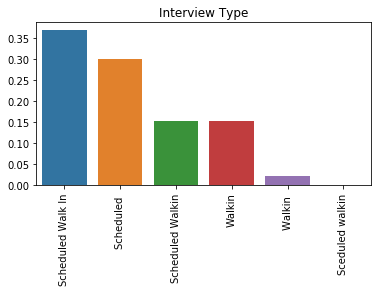

In [62]:
plot_categorical(data=interview_df, col='Interview Type', size=[6 ,3], xlabel_angle=90, title='Interview Type')

### Position Distribution ###

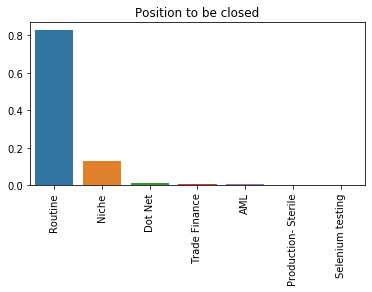

In [69]:
plot_categorical(data=interview_df, col='Position to be closed', size=[6 ,3], xlabel_angle=90, title='Position to be closed')

### Nature of Skillset Distribution ###

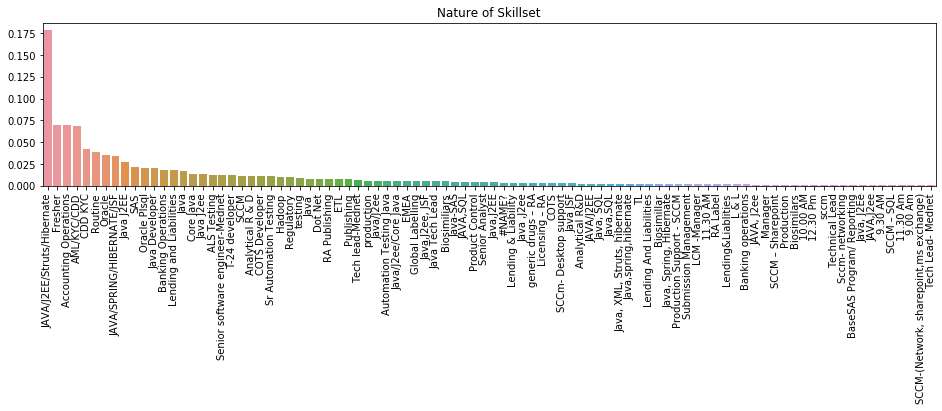

In [76]:
plot_categorical(data=interview_df, col='Nature of Skillset', size=[16 ,3], xlabel_angle=90, title='Nature of Skillset')

### Interview Venue Distribution ###

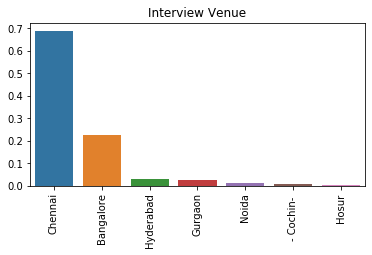

In [160]:
plot_categorical(data=interview_df, col='Interview Venue', size=[6 ,3], xlabel_angle=90, title='Interview Venue')


### Marital Status Distribution ###

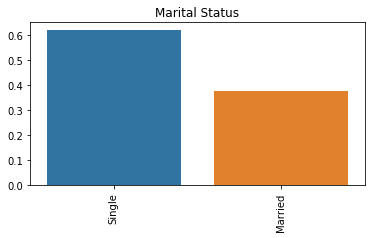

In [161]:
plot_categorical(data=interview_df, col='Marital Status', size=[6 ,3], xlabel_angle=90, title='Marital Status')


### Questionnaire Distribution ###

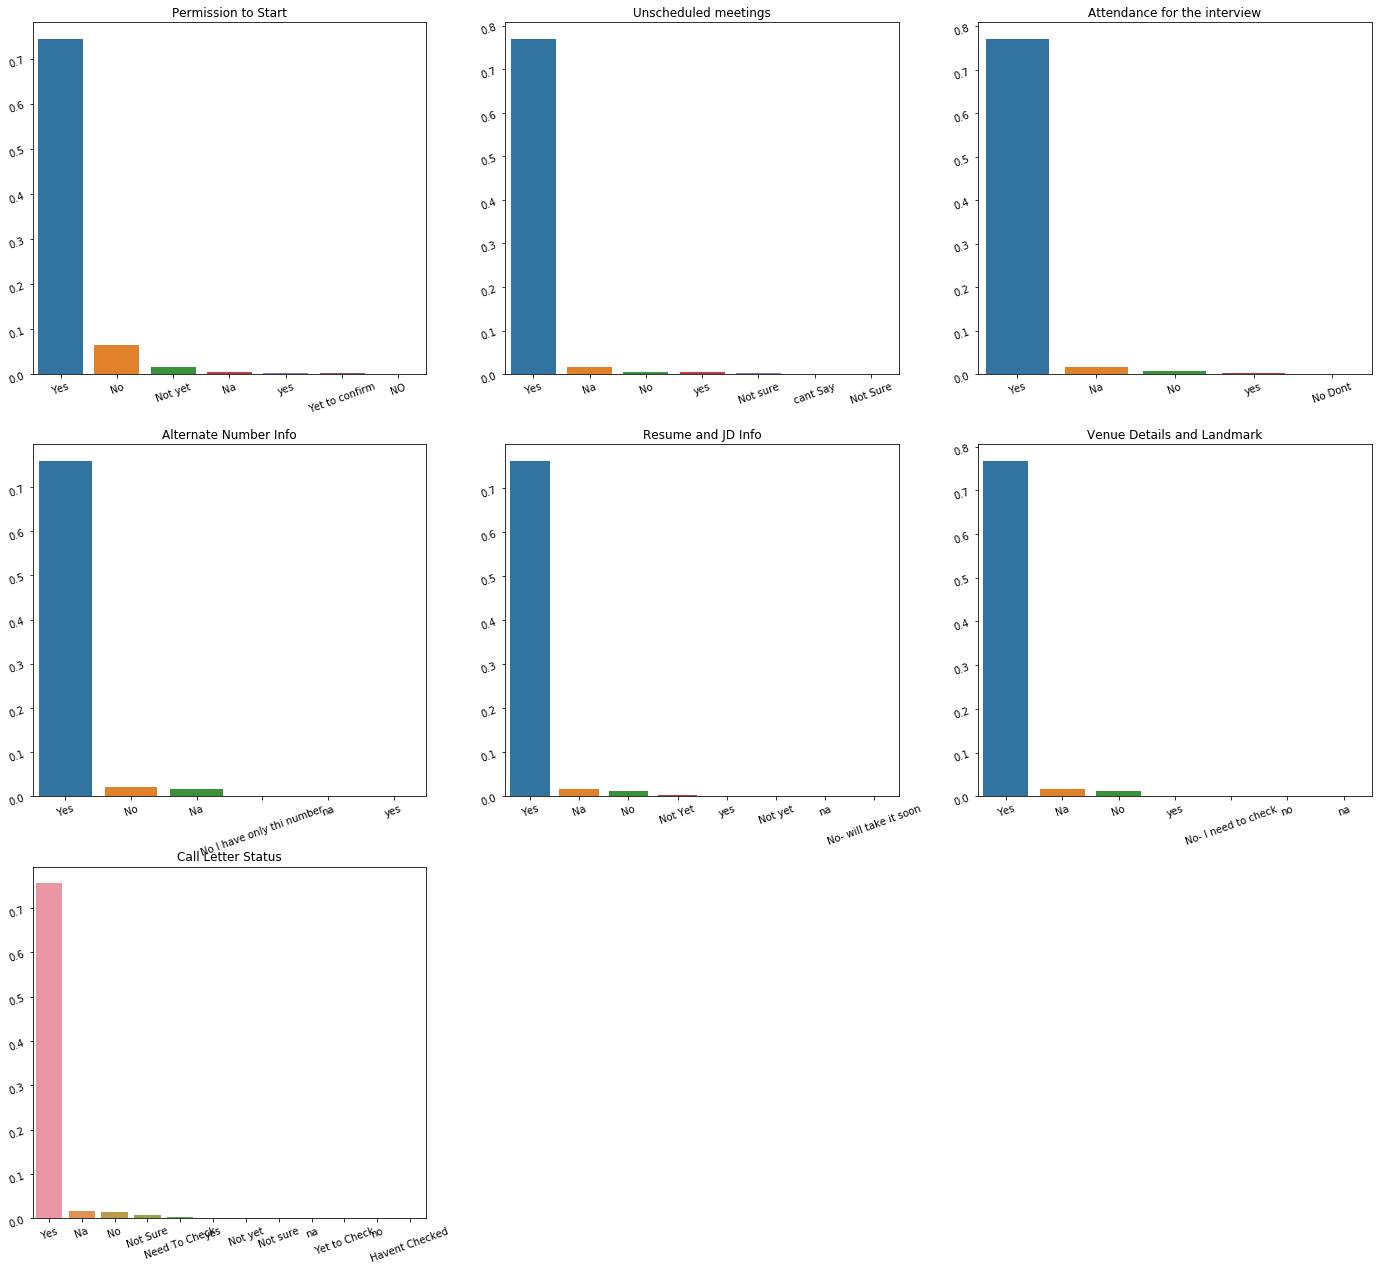

In [147]:
fig, axs = plt.subplots(3,3,figsize=(24,22))
plot_categorical_ax(data=interview_df, fig=fig, axs=axs, col='Have you obtained the necessary permission to start at the required time', size=[8 ,3], xlabel_angle=20, title='Permission to Start',i = 0,j = 0)
plot_categorical_ax(data=interview_df, fig=fig, axs=axs, col='Hope there will be no unscheduled meetings', size=[8 ,3], xlabel_angle=20, title='Unscheduled meetings',i = 0,j = 1)
plot_categorical_ax(data=interview_df, fig=fig, axs=axs, col='Can I Call you three hours before the interview and follow up on your attendance for the interview', size=[8 ,3], xlabel_angle=20, title='Attendance for the interview',i = 0,j = 2)
plot_categorical_ax(data=interview_df, fig=fig, axs=axs, col='Can I have an alternative number/ desk number. I assure you that I will not trouble you too much', size=[8 ,3], xlabel_angle=20, title='Alternate Number Info',i = 1,j = 0)
plot_categorical_ax(data=interview_df, fig=fig, axs=axs, col='Have you taken a printout of your updated resume. Have you read the JD and understood the same', size=[8 ,3], xlabel_angle=20, title='Resume and JD Info',i = 1,j = 1)
plot_categorical_ax(data=interview_df, fig=fig, axs=axs, col='Are you clear with the venue details and the landmark.', size=[8 ,3], xlabel_angle=20, title='Venue Details and Landmark',i = 1,j = 2)
plot_categorical_ax(data=interview_df, fig=fig, axs=axs, col='Has the call letter been shared', size=[8 ,3], xlabel_angle=20, title='Call Letter Status',i = 2,j = 0)

axs[2,1].set_axis_off()
axs[2,2].set_axis_off()
plt.show()

### Null values Heatmap ###

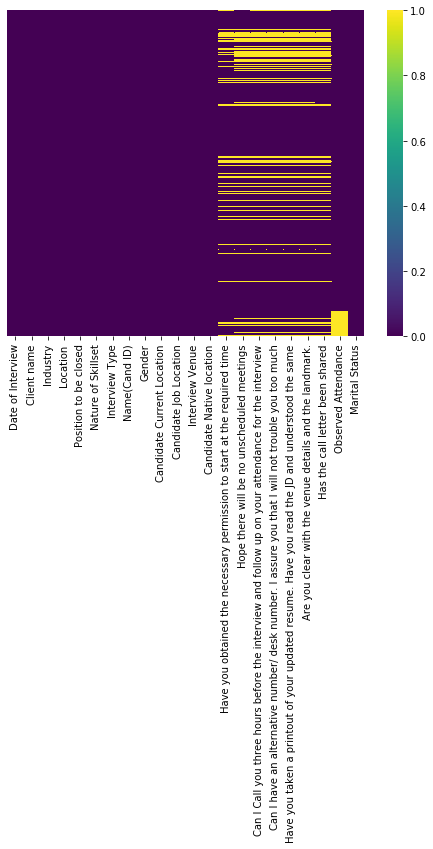

In [172]:
plt.figure(figsize=(8, 6))
sns.heatmap(interview_df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

### Predictor Variables Correlation Heat Map ###

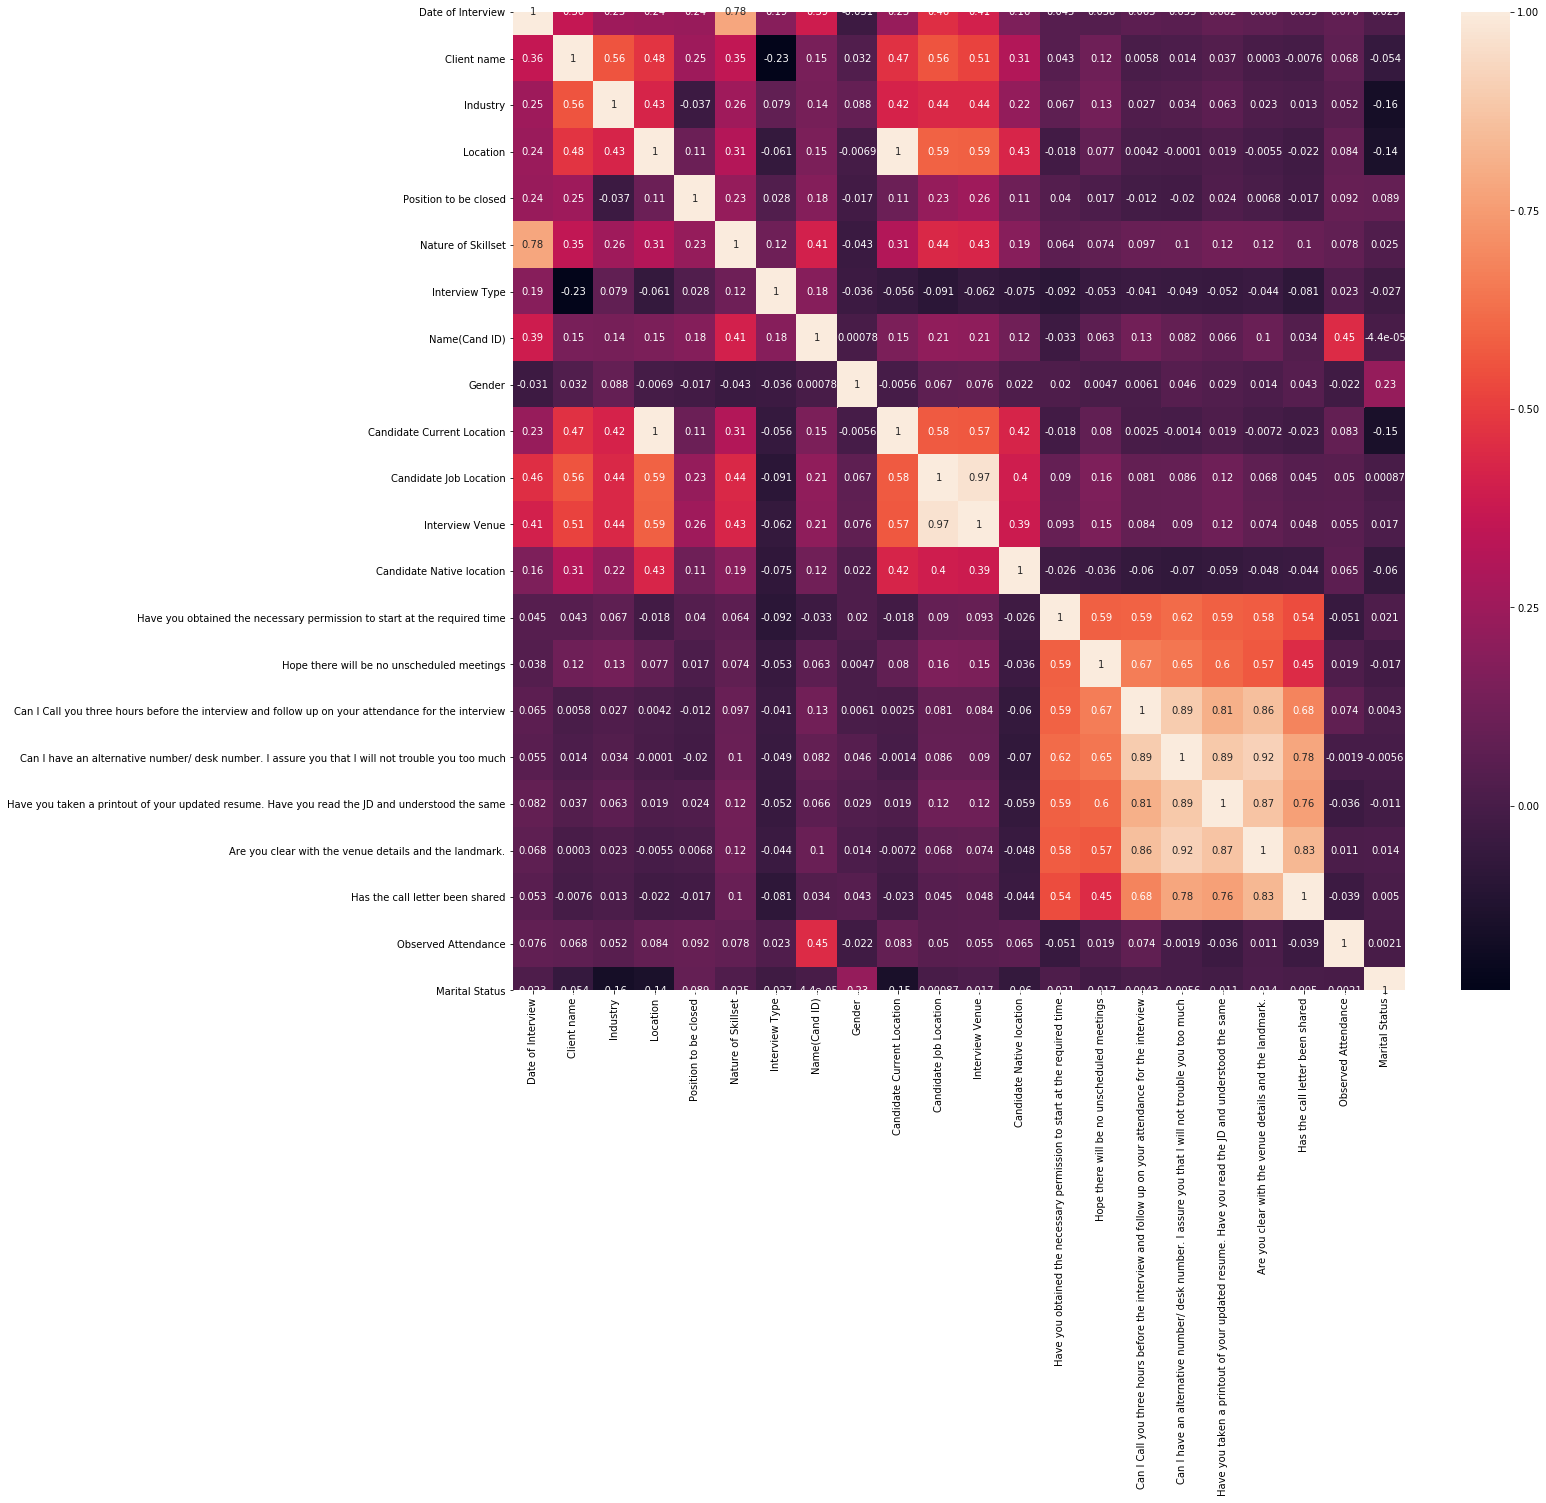

In [214]:
#Built this heat map after data pre-processing but keeping here as it more relevant to EDA#
plt.figure(figsize=(20,18))
#interview_df_test = pd.DataFrame(interview_df, columns=["Client Name", "Client Name"])
sns.heatmap(interview_df.apply(lambda x: x.factorize()[0]).corr(),annot=True)
#interview_df.apply(lambda x: x.factorize()[0]).corr()

### Check Missing values ###

The table below indicates the ratio of missing values on the total dataset. The table lists only those attributes that have at least 1 missing value. From the list below - Fee Revenue, Client Offices and DUNS Number have the very high number of missing values and the ratio is insignificant on the remaining attributes. The attributes with large number of missing values have been determined during EDA are of low significance and will be dropped from model training and evaluation. The observations with missing values on the target variable will be dropped from the final pre-processed dataset. The other numeric variables that are missing values and part of the feature space will be imputed to the mean value.

In [215]:
def find_missing(data):
    # number of missing values
    count_missing = data.isnull().sum().values
    # total records
    total = data.shape[0]
    # percentage of missing
    ratio_missing = count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, index=data.columns.values)
data_missing = find_missing(interview_df)

data_missing.reset_index()[['index', 'missing_ratio']]\
    .rename(columns={'index':'columns', 'missing_ratio':'data_missing_ratio'})\
    .sort_values(['data_missing_ratio'], ascending=False)\
    .query('data_missing_ratio>0')

,columns,data_missing_ratio
18,Are you clear with the venue details and the l...,0.201783
17,Have you taken a printout of your updated resu...,0.201783
16,Can I have an alternative number/ desk number....,0.200972
15,Can I Call you three hours before the intervie...,0.200972
14,Hope there will be no unscheduled meetings,0.200972
19,Has the call letter been shared,0.199352
13,Have you obtained the necessary permission to ...,0.166126
20,Observed Attendance,0.076175
0,Date of Interview,0.000810
12,Candidate Native location,0.000810


### Observations from EDA ###

   1. From the preliminary data statistics I could observe that columns 13 through column 21 are missing values. The ratio of missing values range between 20%-7% and need to determine optimal imputation strategy on these columns or at least on the columns that will be retained on the final preprocessed dataset.

   2. There is an imbalance in the target class and from the distribution it is quite obvious that the target class value has to be standardized across observations using consistent character case. There are 58% observations that have the target variable classified as "Yes" and 32% classified as "No" and ~10% of the observations have NULL values.
 
   3. The Industry distribution needs to be standardized like the other variables. For example, IT services and IT can be merged as a single category which would make the encoding process easier. BFSI domain seems to have significant amount of open positions compared to other domains which is an important observation.

   4. Location distributions like the other variables need to standardized, spell corrected and preprocessed to use a consistent case across observations. It looks like Location variable and Candidate Current Location variable are no different which is evident from a perfect correlation value (1.0) and one of them can be dropped. There seems to be more open positions in Chennai followed by Bangalore compared to other cities and obviously there are more candidates native to Chennai who apply for the open positions compared to other cities. I would have expected the second highest candidate native location to be Bangalore but it is Hyderabad. We may have to observe the results and determine how the native location variables influences the model considering the dimension.

   5. There are more male candidates applying for the open positions compared to female candidates which is expected and don't see any anomaly there.

   6. The Interview Type distribution should be standardized as other variables and spell corrected. It looks there are more scheduled walk-ins compared to walk-ins and scheduled interviews. 

   7. The "Position to be closed" variable looks fine for most part and requires minimal pre-processing. There are more routine positions or regular positions like I expected compared to other kinds of position. Another interesting observation is that the position to be closed variable appears to be a high level roll up of the "Nature of Skillset" variable. 

   8. The skillset distribution has a large number of categories and some of them are redundant. I will have to perform further analysis to understand how this variable affects the prediction, impacts accuracy and determine if this variable is even needed. My initial assumption is that a candidate's skillset may not have a significant impact on the target class.  Because the position to be closed variable appears to be a high level roll up of this variable, I believe this variable is not required and will drop it from the final dataset. I will restore this variable in the final dataset if the model seems underfitted and re-introducing this variable would improve the feature space and the accuracy of prediction.

   9. The frequency of Chennai is higher in the interview venue distribution compared to other cities which closely aligns with our earlier observation of more open positions in Chennai. The extra hyphens in the city name Cochin needs to be corrected but otherwise all the other city names/categories look standardized.

   10. There are more candidates with marital status as single applying for new open positions or changing positions than married candidates which would make sense. There are no anomalies in this variable.

   11. There are multiple questionnaire variables in the dataset and the correlation coefficient between most of these variables is higher than 0.6 based on the correlation matrix that I created. It looks to me that some of these variables can be dropped upon further analysis but I am planning to set a correlation coefficient threshold of 0.9 which would retain most of these variables. All the questionnaire distributions are highly imbalanced in the sense that more than 75% of the observations have the value set to "Yes" on all of them. The variable values need to be  standardized and spell corrected. Although the first look indicates that these variables have binary values, I will impute the missing values (N/A, not sure, can't say, etc.) to either a third category - "Unsure" or convert them to "No". I will convert the values "Not yet", "No" followed by some text to simply "No".

   12. The correlation matrix indicates highly correlated features and based on my threshold of 0.9, I will look to drop "Candidate Current Location", "Candidate Job Location", "Can I have an alternate number/desk number. I assure you that I will not trouble you too much" variables from the dataset that have very high correlation with other features in the dataset.

   13. The Null values heat map reveals that there are significant number of missing values between variable 13 through variable 21. The observations with missing values on the target class will not be used in the model training and evaluation and will be part of the test dataset. As discussed before, I will follow a consistent imputation strategy on the questionnaire variables that will be retained on the final dataset.

   14. I will rename the feature names or column names to improve readability and ease of use during model development.

   15. Some of the features like the Date of interview, Name (Candidate ID) can be dropped from the dataset because they seem less significant and do not think dropping these features would impact the accuracy of prediction.
   
   16. There is one outlier record in the dataset, the last row with all NaN values for all the variables and this record can be dropped from the final dataset.

## Data Pre-Processing and Feature Engineering ##

Data pre-processing is also referred to as the data preparation or data cleaning phase and in this phase unneeded features and outliers will be removed, records with missing values will be dropped, semantic adjustments will be made, categorical features will be transformed to numerical features and missing values will be imputed to generate a final target dataset that can be consumed by the model. This step will also ensure any inconsistencies in the data are corrected and new features are dervied if needed. The full interview dataset will be used in this phase and the above listed data pre-processing steps will be executed to produce the final target dataset. 

### Make a copy of the original dataset ###

In [558]:
interview_df_copy = interview_df.copy()

### Drop unneeded & high correlation features ###

In [559]:
drop_cols = ['Date of Interview',"Candidate Current Location", "Nature of Skillset","Candidate Job Location", "Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"]
interview_df_copy = interview_df_copy.drop(drop_cols,axis=1)

### Semantic adjustments to features names ###

In [560]:
interview_df_copy.rename({'Client name': 'client_name','Industry': 'industry','Location': 'location',
                          'Position to be closed': 'position_to_be_closed','Nature of Skillset': 'nature_of_skillset',
                          'Interview Type': 'interview_type','Name(Cand ID)': 'cand_id','Gender': 'gender',
                          'Interview Venue': 'interview_venue','Candidate Native location': 'candidate_native_location',
                          'Have you obtained the necessary permission to start at the required time': 'permission_to_start',
                          'Hope there will be no unscheduled meetings': 'unscheduled_meetings',
                          'Can I Call you three hours before the interview and follow up on your attendance for the interview': 'attendance_for_interview',
                          'Have you taken a printout of your updated resume. Have you read the JD and understood the same': 'resume_and_jd',
                          'Are you clear with the venue details and the landmark.': 'venue_and_landmark',
                          'Has the call letter been shared': 'call_letter_status','Observed Attendance': 'observed_attendance',
                          'Marital Status': 'marital_status'}, axis=1, inplace=True)

### Standardize categorical feature values ###

In [561]:
interview_df_copy['industry'] = interview_df_copy['industry'].str.replace('IT Products and Services', 'IT')
interview_df_copy['industry'] = interview_df_copy['industry'].str.replace('IT Services', 'IT')
interview_df_copy['location'] = interview_df_copy['location'].str.replace('- Cochin-', 'Cochin')
interview_df_copy['position_to_be_closed'] = interview_df_copy['position_to_be_closed'].str.replace('Production- Sterile', 'Production-Sterile')

interview_df_copy['interview_type'] = interview_df_copy['interview_type'].str.replace('Scheduled Walk In', 'Scheduled Walkin')
interview_df_copy['interview_type'] = interview_df_copy['interview_type'].str.replace('Scheduled walkin', 'Scheduled Walkin')
interview_df_copy['interview_type'] = interview_df_copy['interview_type'].str.replace('Sceduled walkin', 'Scheduled Walkin')
interview_df_copy['interview_venue'] = interview_df_copy['interview_venue'].str.replace('- Cochin-', 'Cochin')

interview_df_copy['candidate_native_location'] = interview_df_copy['candidate_native_location'].str.replace('- Cochin-', 'Cochin')
interview_df_copy['candidate_native_location'] = interview_df_copy['candidate_native_location'].str.replace('Delhi /NCR', 'Delhi')

interview_df_copy['permission_to_start'] = interview_df_copy['permission_to_start'].str.replace('Not yet','No')
interview_df_copy['permission_to_start'] = interview_df_copy['permission_to_start'].str.replace('Yet to confirm','No')

interview_df_copy['attendance_for_interview'] = interview_df_copy['attendance_for_interview'].replace(np.nan, 'No')
interview_df_copy['attendance_for_interview'] = interview_df_copy['attendance_for_interview'].str.replace('No Dont','No')

interview_df_copy['resume_and_jd'] = interview_df_copy['resume_and_jd'].str.replace('Not yet','No')
interview_df_copy['resume_and_jd'] = interview_df_copy['resume_and_jd'].str.replace('Not Yet','No')
interview_df_copy['resume_and_jd'] = interview_df_copy['resume_and_jd'].str.replace('No- will take it soon','No')

interview_df_copy['venue_and_landmark'] = interview_df_copy['venue_and_landmark'].str.replace('No- I need to check','No')

interview_df_copy['call_letter_status'] = interview_df_copy['call_letter_status'].replace(np.nan, 'No')
interview_df_copy['call_letter_status'] = interview_df_copy['call_letter_status'].str.replace('Need To Check','No')
interview_df_copy['call_letter_status'] = interview_df_copy['call_letter_status'].str.replace('Not yet','No')
interview_df_copy['call_letter_status'] = interview_df_copy['call_letter_status'].str.replace('Havent Checked','No')
interview_df_copy['call_letter_status'] = interview_df_copy['call_letter_status'].str.replace('Yet to Check','No')


### Impute missing value for "Questionnaire" variables ###

In [562]:
interview_df_copy['permission_to_start'] = interview_df_copy['permission_to_start'].replace(np.nan, 'No')
interview_df_copy['permission_to_start'] = interview_df_copy['permission_to_start'].str.replace('Na','No')

interview_df_copy['unscheduled_meetings'] = interview_df_copy['unscheduled_meetings'].str.replace('cant Say','No')
interview_df_copy['unscheduled_meetings'] = interview_df_copy['unscheduled_meetings'].str.replace('Na','No')
interview_df_copy['unscheduled_meetings'] = interview_df_copy['unscheduled_meetings'].replace(np.nan,'No')
interview_df_copy['unscheduled_meetings'] = interview_df_copy['unscheduled_meetings'].str.replace('Not Sure','No')
interview_df_copy['unscheduled_meetings'] = interview_df_copy['unscheduled_meetings'].str.replace('Not sure','No')

interview_df_copy['attendance_for_interview'] = interview_df_copy['attendance_for_interview'].str.replace('Na','No')

interview_df_copy['resume_and_jd'] = interview_df_copy['resume_and_jd'].replace(np.nan, 'No')
interview_df_copy['resume_and_jd'] = interview_df_copy['resume_and_jd'].str.replace('Na','No')
interview_df_copy['resume_and_jd'] = interview_df_copy['resume_and_jd'].str.replace('na','No')

interview_df_copy['venue_and_landmark'] = interview_df_copy['venue_and_landmark'].replace(np.nan, 'No')
interview_df_copy['venue_and_landmark'] = interview_df_copy['venue_and_landmark'].str.replace('Na','No')
interview_df_copy['venue_and_landmark'] = interview_df_copy['venue_and_landmark'].str.replace('na','No')

interview_df_copy['call_letter_status'] = interview_df_copy['call_letter_status'].str.replace('Not Sure','No')
interview_df_copy['call_letter_status'] = interview_df_copy['call_letter_status'].str.replace('Not sure','No')
interview_df_copy['call_letter_status'] = interview_df_copy['call_letter_status'].str.replace('Na','No')
interview_df_copy['call_letter_status'] = interview_df_copy['call_letter_status'].str.replace('na','No')

### Drop Outlier record ###

In [563]:
interview_df_copy = interview_df_copy[interview_df_copy.industry.notnull()]

### Lower case column values for consistency ###

In [564]:
interview_df_copy = interview_df_copy.apply(lambda x: x.str.lower())
interview_df_copy = interview_df_copy.apply(lambda x: x.str.strip())

### Exclude observations without a Target class ### 

In [781]:
final_model_dataset = interview_df_copy.copy()
final_model_dataset['observed_attendance_int'] = final_model_dataset['observed_attendance'].map({'no': 0, 'yes': 1})
final_model_dataset['observed_attendance_int'] = final_model_dataset['observed_attendance_int'].fillna(9)
final_model_dataset['observed_attendance_int'].astype('int')
final_model_dataset.drop(['observed_attendance'],axis=1,inplace=True)
final_model_dataset.drop(['cand_id'], axis=1,inplace=True)

## Model comparison using Cross Validation ##

This is a preliminary step to understand how the different modeling techniques compare using the final pre-processed dataset. Different supervised learning models will be explored using basic parameter setting without any fine tuning and based on the outcome of this preliminary experimentation, the hyper parameter settings would be refined for optimal performance on the same dataset. 

### Split the dataset ###

As a first step, the numeric encoded target variable will be isolated from the pre-processed final dataset and dataset will be split randomly using a well known dataset split function in Python (train_test_split)

In [782]:
final_model_dataset_x = final_model_dataset.copy()
final_model_dataset_x.drop(['observed_attendance_int'],axis=1,inplace=True)
final_model_dataset_y = final_model_dataset['observed_attendance_int'].copy()

oe = OneHotEncoder()
final_model_dataset_x = oe.fit_transform(final_model_dataset_x).toarray()

final_model_dataset_x1 = final_model_dataset_x[0:1140]
final_model_dataset_y1 = final_model_dataset_y[0:1140]

X_train,X_test,y_train,y_test = train_test_split(final_model_dataset_x1, final_model_dataset_y1, test_size=0.2, random_state=42)

### Heatmap - No Nulls ###

This step is a re-plot of the missing values heat map to ensure there are no missing values in the final split datasets to be used in the model exploration process. This step may look unnecessary but it is a good modeling practice to ensure all missing values are accounted for before conducting training and evaluation to avoid any unintended results.

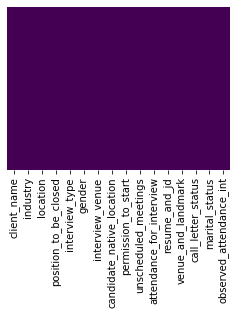

In [783]:
plt.figure(figsize=(4, 3))
#df_2 = pd.DataFrame(client_df, columns=["Product_Group", "num_employees_fill"])
sns.heatmap(final_model_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Model Comparison ###

Multiple supervised learning techniques/algorithms will be explored in this step using the sub-sampled dataset including Decision Tree, LDA, Gaussian NB, KNN, Logistic Regression with basic parameter setting and cross validation will be employed to identify the best estimator that produces the best accuracy score. The results of cross validation on trained models using the sub sampled dataset indicate that the tree based method (Decision Tree Classifier) performs better than the other modeling techniques. In the model training and evaluation phase, an ensemble method will also be explored and compared with the results of other modeling techniques. SVM classifier although could produce the same level accuracy as the tree based method may not be ideal for Production setting due to the performance issues associated with it on training large datasets.

LR: 0.780896 (0.026344)
LDA: 0.776684 (0.026265)
KNN: 0.714817 (0.020071)
CART: 0.750822 (0.020956)
NB: 0.170788 (0.044958)
SVM: 0.782850 (0.027503)


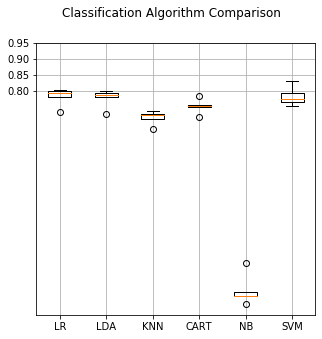

In [784]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
#Standardize the data
for name, model in models:
    kfold = KFold(n_splits=5, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(5,5))
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.yticks(np.arange(0.8, 1.0, .05)) 
plt.show()

## Model Training & Evaluation using Pre-Processed Data ##

The final cleaned up pre-processed dataset contains 15 features and a target variable. The supervised learning modeling techniques discussed in the previous section will be trained and evaluated on the full dataset and in addition one ensemble method (Random Forest would be explored) and Neural Network classifier will be explored. This exploration on the final pre-processed dataset will help in deciding the ideal modeling technique for Production implementation both in terms of model accuracy and performance. The results of the experimentation and training & evaluation are discussed in the "Conclusions" section.

### Supervised Learning Methods Exploration ###

#### Train Decision Tree Classifier ####

According to (Pedregosa et al, 2011), Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of the target variable by learning simple decision rules inferred from the data features. Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and fitter the model. As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples. The result of training and evaluation of the DT model on train and test data is shown below in a table. The accuracy outcome and performance will be discussed in detail in the "Conclusions" section.

In [785]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [786]:
results = pd.DataFrame(columns=["Model description", "Train F1 Score", "Test F1 Score", "Train Accuracy Score", "Test Accuracy Score", "Train AUC-ROC Score", "Test AUC-ROC Score", "Train Pred Time", "Test Pred Time"])
pd.set_option('display.max_colwidth', 0)

start = time.time()
y_train_pred = dt_model.predict(X_train)
train_time = time.time() - start
start = time.time()
y_test_pred = dt_model.predict(X_test)
test_time = time.time() - start

# add the result of this experiment ot the log book
results.loc[len(results)] = ["SKLearn Decision Tree Classifier Model",
                            f1_score(y_train_pred, y_train),
                            f1_score(y_test_pred, y_test),
                            accuracy_score(y_train_pred, y_train),
                            accuracy_score(y_test_pred, y_test),
                            roc_auc_score(y_train_pred, y_train),
                            roc_auc_score(y_test_pred, y_test),                                                         
                            train_time,
                            test_time]
#results

#### Plot AUC Curve ####

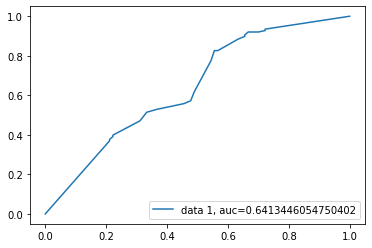

In [787]:
y_pred_proba = dt_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Train Gaussian NB Classifier ####

According to (Pedregosa et al, 2011), Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian and the parameters (mean, sd) are estimated using maximum likelihood. The result of training and evaluation of the Gaussian NB model on train and test data is shown below in a table. The accuracy outcome and performance will be discussed in detail in the "Conclusions" section.

In [788]:
nb_model = GaussianNB(var_smoothing=1)
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1)

In [789]:
start = time.time()
y_train_pred = nb_model.predict(X_train)
train_time = time.time() - start
start = time.time()
y_test_pred = nb_model.predict(X_test)
test_time = time.time() - start

# add the result of this experiment ot the log book
results.loc[len(results)] = ["SKLearn Gaussian NB Classifier Model",
                            f1_score(y_train_pred, y_train),
                            f1_score(y_test_pred, y_test),
                            accuracy_score(y_train_pred, y_train),
                            accuracy_score(y_test_pred, y_test),
                            roc_auc_score(y_train_pred, y_train),
                            roc_auc_score(y_test_pred, y_test),                            
                            train_time,
                            test_time]
#results

#### Plot AUC Curve ####

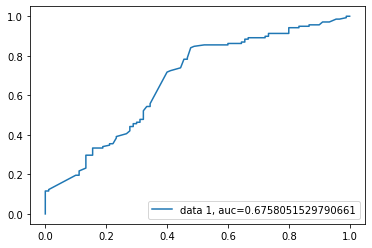

In [790]:
y_pred_proba = nb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Train Bernoulli Naive Bayes Classifier ####

According to (Pedregosa et al, 2011), Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter). The result of training and evaluation of the Bernoulli NB model on train and test data is shown below in a table. The accuracy outcome and performance will be discussed in detail in the "Conclusions" section.

In [815]:
#from sklearn.naive_bayes import BernoulliNB
nb2_model = BernoulliNB()
nb2_model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [816]:
start = time.time()
y_train_pred = nb2_model.predict(X_train)
train_time = time.time() - start
start = time.time()
y_test_pred = nb2_model.predict(X_test)
test_time = time.time() - start

# add the result of this experiment ot the log book
results.loc[len(results)] = ["SKLearn Bernoulli NB Classifier Model",
                            f1_score(y_train_pred, y_train),
                            f1_score(y_test_pred, y_test),
                            accuracy_score(y_train_pred, y_train),
                            accuracy_score(y_test_pred, y_test),
                            roc_auc_score(y_train_pred, y_train),
                            roc_auc_score(y_test_pred, y_test),                            
                            train_time,
                            test_time]
#results

#### Plot AUC Curve ####

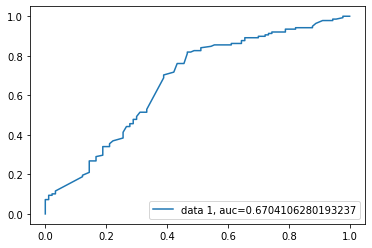

In [817]:
y_pred_proba = nb2_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Train KNN Classifier ####

According to (Pedregosa et al, 2011), Neighbors-based classification is a type of instance-based learning or non-generalizing learning it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point. The neighbors classification in KNeighborsClassifier is a most commonly used technique. The optimal choice of the value  is highly data-dependent: in general a larger k-value suppresses the effects of noise, but makes the classification boundaries less distinct. The result of training and evaluation of the KNN model on train and test data is shown below in a table. The accuracy outcome and performance will be discussed in detail in the "Conclusions" section.

In [791]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [792]:
start = time.time()
y_train_pred = knn_model.predict(X_train)
train_time = time.time() - start
start = time.time()
y_test_pred = knn_model.predict(X_test)
test_time = time.time() - start

# add the result of this experiment ot the log book
results.loc[len(results)] = ["SKLearn KNN Classifier Model",
                            f1_score(y_train_pred, y_train),
                            f1_score(y_test_pred, y_test),
                            accuracy_score(y_train_pred, y_train),
                            accuracy_score(y_test_pred, y_test),
                            roc_auc_score(y_train_pred, y_train),
                            roc_auc_score(y_test_pred, y_test),                                                         
                            train_time,
                            test_time]
#results

#### Plot AUC Curve ####

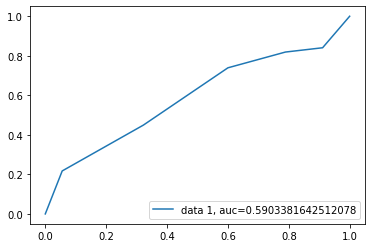

In [793]:
y_pred_proba = knn_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Train SVM Classifier ####

(Navlani, 2019) - Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes. 

Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier. A hyperplane is a decision plane which separates between a set of objects having different class memberships.

A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

In [794]:
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [795]:
start = time.time()
y_train_pred = svc_model.predict(X_train)
train_time = time.time() - start
start = time.time()
y_test_pred = svc_model.predict(X_test)
test_time = time.time() - start

# add the result of this experiment ot the log book
results.loc[len(results)] = ["SKLearn SVM Classifier Model",
                            f1_score(y_train_pred, y_train),
                            f1_score(y_test_pred, y_test),
                            accuracy_score(y_train_pred, y_train),
                            accuracy_score(y_test_pred, y_test),
                            roc_auc_score(y_train_pred, y_train),
                            roc_auc_score(y_test_pred, y_test),                                                         
                            train_time,
                            test_time]
#results

#### Plot AUC Curve ####

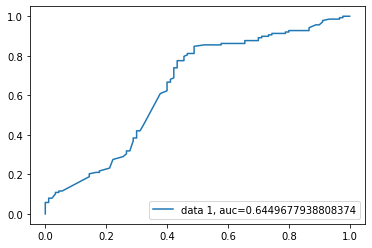

In [796]:
y_pred_proba = svc_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Train Random Forest Classifier ####

According to (Pedregosa et al, 2011), there are two ensemble based averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. Both algorithms are perturb-and-combine techniques specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers. As other classifiers, forest classifiers have to be fitted with two arrays: a sparse or dense array X of size [n_samples, n_features] holding the training samples, and an array Y of size [n_samples] holding the target values (class labels) for the training sample. The result of training and evaluation of the Random Forest model on train and test data is shown below in a table. The accuracy outcome and performance will be discussed in detail in the "Conclusions" section.

In [797]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [798]:
start = time.time()
y_train_pred = rf_model.predict(X_train)
train_time = time.time() - start
start = time.time()
y_test_pred = rf_model.predict(X_test)
test_time = time.time() - start

# add the result of this experiment ot the log book
results.loc[len(results)] = ["SKLearn Random Forest Classifier Model",
                            f1_score(y_train_pred, y_train),
                            f1_score(y_test_pred, y_test),
                            accuracy_score(y_train_pred, y_train),
                            accuracy_score(y_test_pred, y_test),
                            roc_auc_score(y_train_pred, y_train),
                            roc_auc_score(y_test_pred, y_test),                                                         
                            train_time,
                            test_time]
#results

#### Plot AUC Curve ####

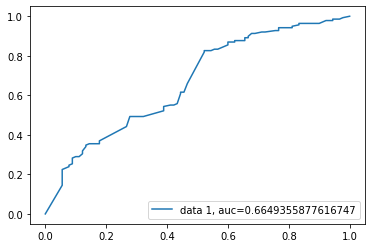

In [799]:
y_pred_proba = rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Confusion Matrix for Random Forest Tree Classifier (one example) ####

The confusion matrix is a useful method to describe the performance of a classification model on a set of test data for which true values are known. Below is a sample observation of confusion matrix for the random forest classifier model. The following information can be extracted from a confusion matrix.

<b> True Positive (TP)</b> : Model correctly predicted Positive cases as Positive.

<b> False Positive (FP)</b>: Model incorrectly predicted Negative cases as Positive.

<b> False Negative (FN)</b>: Model incorrectly predicted Positive cases as Negative.

<b> True Negative (TN)</b> : Model correctly predicted Negative cases as Negative.

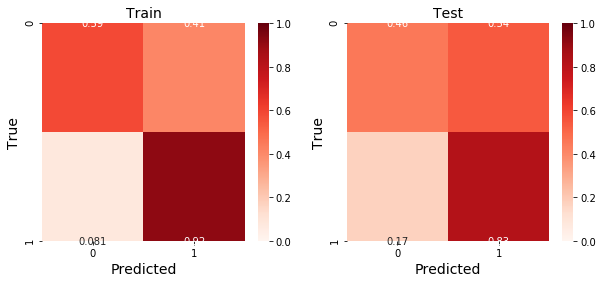

In [800]:
cm_train = confusion_matrix(y_train, y_train_pred).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_test = confusion_matrix(y_test, y_test_pred).astype(np.float32)
cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 4))
plt.subplot(121)
g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=[0,1], yticklabels=[0,1])
plt.title("Train", fontsize=14)

plt.subplot(122)
g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=[0,1], yticklabels=[0,1])
plt.title("Test", fontsize=14);

#### Train LR Classifier ####

According to (Pedregosa et al, 2011), Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. The sklearn implementation of logistic regression can fit binary, One-vs-Rest, or multinomial logistic regression with optional Ridge, Lasso or Elastic-Net regularization. The result of training and evaluation of the Random Forest model on train and test data is shown below in a table. The accuracy outcome and performance will be discussed in detail in the "Conclusions" section.

In [801]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [802]:
start = time.time()
y_train_pred = lr_model.predict(X_train)
train_time = time.time() - start
start = time.time()
y_test_pred = lr_model.predict(X_test)
test_time = time.time() - start

# add the result of this experiment ot the log book
results.loc[len(results)] = ["SKLearn LR Classifier Model",
                            f1_score(y_train_pred, y_train),
                            f1_score(y_test_pred, y_test),                             
                            accuracy_score(y_train_pred, y_train),
                            accuracy_score(y_test_pred, y_test),
                            roc_auc_score(y_train_pred, y_train),
                            roc_auc_score(y_test_pred, y_test),                                                         
                            train_time,
                            test_time]
#results

#### Plot AUC Curve ####

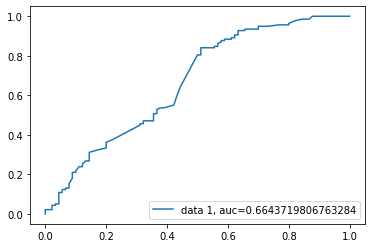

In [803]:
y_pred_proba = lr_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Train NN Classifier (Neural Network for Classification) ####

(Claus, 2019) - A neural network consists of units (neurons), arranged in layers, which convert an input vector into some output.  Each unit takes an input, applies a (often nonlinear) function to it and then passes the output on to the next layer.  Generally the networks are defined to be feed-forward: a unit feeds its output to all the units on the next layer, but there is no feedback to the previous layer.  Weightings are applied to the signals passing from one unit to another, and it is these weightings which are tuned in the training phase to adapt a neural network to the particular problem at hand.

In [804]:
from keras import Sequential
from keras.layers import Dense
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=105))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=250)

Epoch 1/250
912/912 [==============================] - 1s 1ms/step - loss: 0.6884 - accuracy: 0.6404
Epoch 2/250
912/912 [==============================] - 0s 321us/step - loss: 0.6684 - accuracy: 0.6480
Epoch 3/250
912/912 [==============================] - 0s 322us/step - loss: 0.6339 - accuracy: 0.6480
Epoch 4/250
912/912 [==============================] - 0s 317us/step - loss: 0.6190 - accuracy: 0.6480
Epoch 5/250
912/912 [==============================] - 0s 318us/step - loss: 0.6132 - accuracy: 0.6480
Epoch 6/250
912/912 [==============================] - 0s 322us/step - loss: 0.6088 - accuracy: 0.6480
Epoch 7/250
912/912 [==============================] - 0s 308us/step - loss: 0.6053 - accuracy: 0.6480
Epoch 8/250
912/912 [==============================] - 0s 317us/step - loss: 0.6005 - accuracy: 0.6502
Epoch 9/250
912/912 [==============================] - 0s 312us/step - loss: 0.5951 - accuracy: 0.6787
Epoch 10/250
912/912 [==============================] - 0s 320us/step - los

912/912 [==============================] - 0s 320us/step - loss: 0.5362 - accuracy: 0.7259
Epoch 80/250
912/912 [==============================] - 0s 450us/step - loss: 0.5357 - accuracy: 0.7259
Epoch 81/250
912/912 [==============================] - 0s 381us/step - loss: 0.5354 - accuracy: 0.7226
Epoch 82/250
912/912 [==============================] - 0s 314us/step - loss: 0.5347 - accuracy: 0.7270
Epoch 83/250
912/912 [==============================] - 0s 472us/step - loss: 0.5379 - accuracy: 0.7259
Epoch 84/250
912/912 [==============================] - 0s 304us/step - loss: 0.5358 - accuracy: 0.7259
Epoch 85/250
912/912 [==============================] - 0s 329us/step - loss: 0.5353 - accuracy: 0.7259
Epoch 86/250
912/912 [==============================] - 0s 326us/step - loss: 0.5353 - accuracy: 0.7248
Epoch 87/250
912/912 [==============================] - 0s 292us/step - loss: 0.5359 - accuracy: 0.7292
Epoch 88/250
912/912 [==============================] - 0s 321us/step - loss:

912/912 [==============================] - 0s 328us/step - loss: 0.5308 - accuracy: 0.7336
Epoch 158/250
912/912 [==============================] - 0s 311us/step - loss: 0.5305 - accuracy: 0.7270
Epoch 159/250
912/912 [==============================] - 0s 313us/step - loss: 0.5309 - accuracy: 0.7325
Epoch 160/250
912/912 [==============================] - 0s 356us/step - loss: 0.5301 - accuracy: 0.7292
Epoch 161/250
912/912 [==============================] - 0s 348us/step - loss: 0.5308 - accuracy: 0.7325
Epoch 162/250
912/912 [==============================] - 0s 353us/step - loss: 0.5299 - accuracy: 0.7281
Epoch 163/250
912/912 [==============================] - 0s 381us/step - loss: 0.5283 - accuracy: 0.7325
Epoch 164/250
912/912 [==============================] - 0s 317us/step - loss: 0.5313 - accuracy: 0.7303
Epoch 165/250
912/912 [==============================] - 0s 310us/step - loss: 0.5299 - accuracy: 0.7303
Epoch 166/250
912/912 [==============================] - 0s 313us/ste

912/912 [==============================] - 0s 309us/step - loss: 0.5242 - accuracy: 0.7292
Epoch 236/250
912/912 [==============================] - 0s 280us/step - loss: 0.5240 - accuracy: 0.7281
Epoch 237/250
912/912 [==============================] - 0s 269us/step - loss: 0.5243 - accuracy: 0.7303
Epoch 238/250
912/912 [==============================] - 0s 297us/step - loss: 0.5233 - accuracy: 0.7270
Epoch 239/250
912/912 [==============================] - 0s 379us/step - loss: 0.5227 - accuracy: 0.7292
Epoch 240/250
912/912 [==============================] - 0s 316us/step - loss: 0.5239 - accuracy: 0.7303
Epoch 241/250
912/912 [==============================] - 0s 329us/step - loss: 0.5219 - accuracy: 0.7303
Epoch 242/250
912/912 [==============================] - 0s 439us/step - loss: 0.5228 - accuracy: 0.7357
Epoch 243/250
912/912 [==============================] - 0s 317us/step - loss: 0.5250 - accuracy: 0.7270
Epoch 244/250
912/912 [==============================] - 0s 323us/ste

In [805]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

912/912 [==============================] - 0s 312us/step


[0.5187824410304689, 0.7335526347160339]

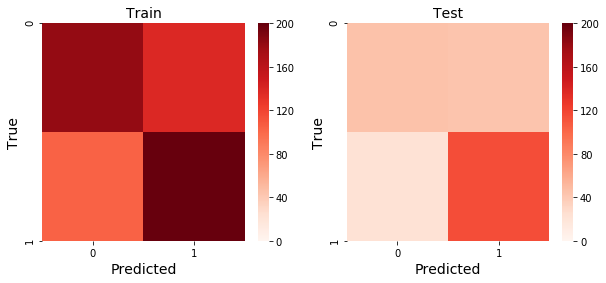

In [806]:
start = time.time()
y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred>0.5)
cm_train = confusion_matrix(y_train, y_train_pred)
train_time = time.time() - start
start = time.time()
y_test_pred = classifier.predict(X_test)
y_test_pred = (y_test_pred>0.5)
cm_test = confusion_matrix(y_test, y_test_pred)
test_time = time.time() - start

# add the result of this experiment ot the log book
results.loc[len(results)] = ["Keras NN Classifier Model",
                            f1_score(y_train_pred, y_train),
                            f1_score(y_test_pred, y_test),                             
                            accuracy_score(y_train_pred, y_train),
                            accuracy_score(y_test_pred, y_test),
                            roc_auc_score(y_train_pred, y_train),
                            roc_auc_score(y_test_pred, y_test),                                                         
                            train_time,
                            test_time]
#results

plt.figure(figsize=(10, 4))
plt.subplot(121)
g = sns.heatmap(cm_train, vmin=0, vmax=200, annot=False, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=[0,1], yticklabels=[0,1])
plt.title("Train", fontsize=14)

plt.subplot(122)
g = sns.heatmap(cm_test, vmin=0, vmax=200, annot=False, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=[0,1], yticklabels=[0,1])
plt.title("Test", fontsize=14);

#### Plot AUC Curve ####

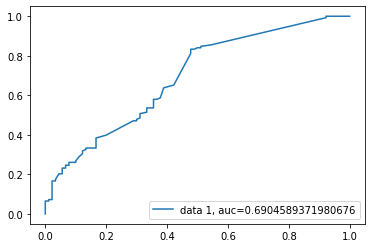

In [808]:
y_pred_proba = classifier.predict_proba(X_test)[::,0]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Feature Importance ##

The below plots show the importance of features on the tree based modeling methods used on our pre-processed dataset.  The red bars are the feature importances of the tree based methods and the plot shows the number of features that are informative compared to other features and how they contributed to the model accuracy. Although the Product Coverage and Product Line attributes are shown as the most important features in both the methods, there are other features/attributes of low importance and are different between the tree based methods which is an interesting observation.

### Random Forest Classifier ###

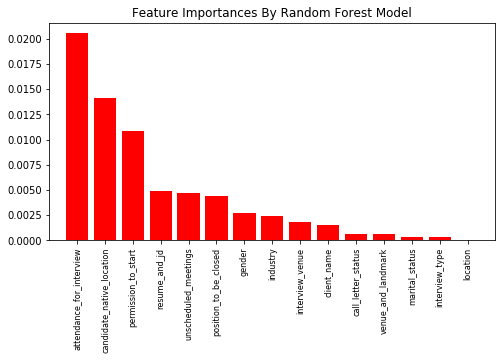

In [810]:
final_model_dataset_imp_x = final_model_dataset.copy()
final_model_dataset_imp_x.drop(['observed_attendance_int'],axis=1,inplace=True)
importances=rf_model.feature_importances_
imp_con = np.array(importances[0:15])
std = np.std([imp_con for tree in rf_model],
             axis=0)
indices = np.argsort(imp_con)[::-1]
sorted_important_features=[]
predictors=final_model_dataset_imp_x.columns
for i in indices:
    sorted_important_features.append(predictors[i])
plt.figure(figsize=(8,4))
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), imp_con[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical',fontsize=8)

plt.xlim([-1, np.size(predictors)]);

### Decision Tree Classifier ###

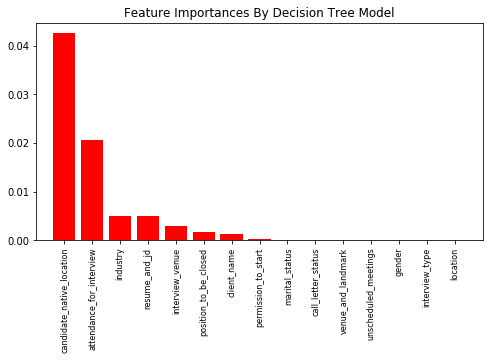

In [811]:
importances=dt_model.feature_importances_
imp_con = np.array(importances[0:15])
indices = np.argsort(imp_con)[::-1]
sorted_important_features=[]
predictors=final_model_dataset_imp_x.columns
for i in indices:
    sorted_important_features.append(predictors[i])
plt.figure(figsize=(8,4))
plt.title("Feature Importances By Decision Tree Model")
plt.bar(range(np.size(predictors)), imp_con[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical',fontsize=8)
plt.yticks(np.arange(0.0,0.05,0.01))
plt.xlim([-1, np.size(predictors)]);

## Task-1b. Probability and Prediction where "Observed Attendance" column is NULL ##

In [828]:
final_model_dataset_x2 = final_model_dataset_x[1140:]
final_model_dataset_y2 = final_model_dataset_y[1140:]

lr_array  = lr_model.predict_proba(final_model_dataset_x2)
svc_array = svc_model.predict_proba(final_model_dataset_x2)

lr_array2  = lr_model.predict(final_model_dataset_x2)
svc_array2 = svc_model.predict(final_model_dataset_x2)
#nn_array  = classifier.predict_proba(final_model_dataset_x2)

lr_dataset  = pd.DataFrame({'Candidate_id': interview_df_copy['cand_id'].iloc[1140:], 'Class_no_Probability': lr_array[:, 0], 'Class_yes_Probability': lr_array[:, 1], 'Observed_Attendance': lr_array2[:]})
svc_dataset = pd.DataFrame({'Candidate_id': interview_df_copy['cand_id'].iloc[1140:], 'Class_no_Probability': svc_array[:, 0], 'Class_yes_Probability': svc_array[:, 1], 'Observed_Attendance': svc_array2[:]})
#nn_dataset  = pd.DataFrame({'Candidate_id': interview_df_copy['cand_id'].iloc[1140:], 'Class_Probabilities': nn_array[:, 0]})

lr_dataset.to_csv('logistic_regression_probabilities.csv')
svc_dataset.to_csv('support_vector_machines_probabilities.csv')
#nn_dataset.to_csv('neural_network_probabilities.csv')

## Model Conclusions ##

<h3> Model Pipeline </h3>

To answer the case study question, multiple models with different algorithms and parameter setting were built without any major hyper parameter tuning. To train and evaluate the models, a pre-processed dataset with an optimal set of features was required. To accomplish this, different pre-processing methods and feature selection techniques were employed to identify a final set of 15 features. The objective of the case study as the data, pre-processing & feature extraction techniques were explored was to conduct multiple experiments using different algorithms to build an optimized model that predicts with high accuracy. It is necessary for any model that will be operationalized to explore different hyper parameter setting for all the different models including the ones that came up with a low accuracy score to achieve high business value. Also exploring the hyper parameter space for all the models would help understand deeply on what features are impacting the accuracy and offer valuable learnings for future implementations.

<h3> Pre-processing and Feature Engineering </h3>

The case study also explored the possibility of deriving new features/encoded features and visually explored the importance of all the features in certain models that were built. It is a essential data preparation activity to identify or derive new features and include them in the experimentation specifically in cases where the raw data is not directly usable. These derived features can significantly complement the model and positively impact the model performance but a right balance should be maintained because overdoing the feature engineering process may result in overfitting and skew the model. The case study conducted confirms the understanding that model processing improved and performed better through pre-processing techniques. Excluding features from the model training that were least important was of high significance, feature importance information can be further evaluated to even further reduce the feature space and will be of great help during operationalization. Also, imputation strategies were employed, unneeded features were dropped, data type conversions and semantic adjustments were made, highly correlated features were excluded, outliers were eliminated and encoding strategy was used to transform categorical attributes. All of these data pre-processing and feature engineering steps had a significant positive impact on the model training and evaluation and helped in developing an optimized model with only essential features.

<h3> Outcome of Experiments </h3>

As described in the model pipeline section for the problem setting, multiple models were explored including Neural Network, Decision Tree, Random Forest, Support Vector Machine, Naive Bayes, KNN, Logistic Regression with different parameter setting and cross validation was used to identify the best estimator that produced the best evaluation score. During model exploration, I attempted to fit all of these models and some of them resulted in poor performance meaning they will not be an ideal solution for the problem that we are trying to solve. The KNN classifier for example produced a low accuracy score and will not be an ideal candidate for operationalization because of the prediction accuracy as well as concern over performance on larger datasets if the model has to be tuned further using large historical dataset in the future. The Neural Network classifier with two hidden layers seems to offer a better F1 score and accuracy compared to other methods. I will continue to explore a deeper neural network and will observe the outcome. <b> Logistic Regression & Neural Network </b> methods seem to be recommended models for real time implementation but there is also a need to understand the difference in performance if more observations are included in the training set. The experimental results for each of the algorithms that were explored can be found below.

<h3> Location Heuristics </h3>

One of the several aspects of feature engineering (optimized feature space) that I am continuing to explore is reducing the dimensionality of the location variables. The location variables on a small historical dataset may not be good sample size to train and evaluate an optimized model and the sparse location vector created at the time of training may not be sufficient for new predictions and may result in a low prediction accuracy. Also, the sparsity of these vectors will continue to increase if more observations with new locations are added to the historical dataset and the model is retrained. I believe it would be ideal to derive new features like distance between the candidate location and interview location, distance between candidate location and job location, etc. from the location variables (using latitude & longitude determined from invoking Geocoding APIs) rather than trying to vectorize the location itself. 

<h3> Model Algorithms </h3>

Following are the different algorithms that were explored for the research question. The next logical to this research would be to build home grown optimizers as a future extension to this research.

1. KNN Classifier
2. Gaussian NB
3. Random Forest Classifier
4. Decision Tree Classifier
5. LDA
6. SVC (Support Vector Machine)
7. Logistic Regression Classifier
8. Neural Network Classifier


<h3> Results Table </h3>

In [818]:
#results
results

,Model description,Train F1 Score,Test F1 Score,Train Accuracy Score,Test Accuracy Score,Train AUC-ROC Score,Test AUC-ROC Score,Train Pred Time,Test Pred Time
0,SKLearn Decision Tree Classifier Model,0.856685,0.752475,0.803728,0.671053,0.796299,0.654978,0.001009,0.000689
1,SKLearn Gaussian NB Classifier Model,0.782676,0.762821,0.691886,0.675439,0.658018,0.666028,0.003805,0.001555
2,SKLearn KNN Classifier Model,0.768067,0.693878,0.697368,0.605263,0.667412,0.576923,0.165851,0.030842
3,SKLearn SVM Classifier Model,0.785714,0.767742,0.697368,0.684211,0.665310,0.676287,0.108958,0.018713
4,SKLearn Random Forest Classifier Model,0.857820,0.757475,0.802632,0.679825,0.800956,0.665078,0.006101,0.004206
5,SKLearn LR Classifier Model,0.805255,0.779553,0.723684,0.697368,0.703091,0.697628,0.001171,0.002908
6,Keras NN Classifier Model,0.800329,0.774411,0.733553,0.706140,0.707159,0.694969,0.165162,0.007966
7,SKLearn Bernoulli NB Classifier Model,0.788447,0.761290,0.702851,0.675439,0.672248,0.664452,0.005113,0.001839


## Task-2. Explaining Model Discrepancy ##

The model may not be providing optimal prediction in certain cases and the reason for low accuracy or less optimal predictions can be attributed to the following reasons. Model training and fine tuning is an iterative process and it is essential for every data scientist or ML engineer to create a feedback loop to re-train and fine tune the model periodically using the outcome of new predictions.

<b> Training Data Size (Historical Data) </b> Supervised learning methods rely on availability of lot of annotated data for training, the labeled training dataset provided for this model is not entirely representative or large enough sample size for the problem we are trying to solve. I should look to collect more data or increase the training data size artifically using data augmentation methods and re-train the model.

<b> Feature Space </b> I discussed about location heuristics in the model conclusions section. The location variables on a small historical dataset may not be good sample size to train and evaluate an optimized model, the sparse location vector created at the time of training may not be sufficient for new predictions and may contribute to low prediction accuracy.  If a location that was not part of the training data was observed in a new prediction request then the outcome of that prediction would be sub-optimal. It would be ideal to derive new features like distance between the candidate location and interview location, distance between candidate location and job location, etc. from the location variables (using latitude & longitude determined from invoking Geocoding APIs) rather than trying to vectorize the location itself. Some of the questionnaire variables had ambiguous values or missing values in certain cases, I made reasonable assumptions to impute those variables during model building. If I can get more insight into such variables with missing or ambiguous values and able to fix them without having to impute then I believe the prediction accuracy can be increased. In the pre-processed model dataset, I dropped features like nature of skillset based on empirical evidence that it is closely related to position to be closed feature. I may have to restore such features although they could increase the dimensions but can potentially improve the accuracy of prediction. Also some of the low importance features identified through model experimentation can be dropped and the correlation threshold can be reduced from 0.9 to drop certain features potentially contributing to improved accuracy. In essence, a deeper look into the feature space (inputs to the model) is required to either add new features or drop existing features that can directly influence the performance of the model.

<b> Hyper parameter Space </b> As I mentioned in the conclusions section before, I have not explored all of the hyper parameter space. A deeper exploration into the hyper paramater space could help increase the accuracy of prediction. The hyper parameters are levers or knobs to optimize the performance of the model and help significantly in achieving a balanced model that does not underfit or overfit the training data and improves the accuracy of future predictions. I am not going to discuss in detail on different hyper parameter setting that can be tuned on the models created in this case study but there are several parameters associated with these modeling techniques that can be explored iteratively.

The model has been trained using a certain feature space with limited observations. As I have detailed before some of the features like the interview venue, location, client name etc. do not have enough variations across observations and there is a high potential to observe new prediction requests with values on these features that are significantly different from the trained dataset. For now until the model is further optimized, fine tuned and re-trained with a larger dataset it would be good to evaluate the model with new data similar to what was observed in the training set or at least on those features where there is a possibility of observing values different from those in the training set.

## Task-3. Implementing Model as REST API ##

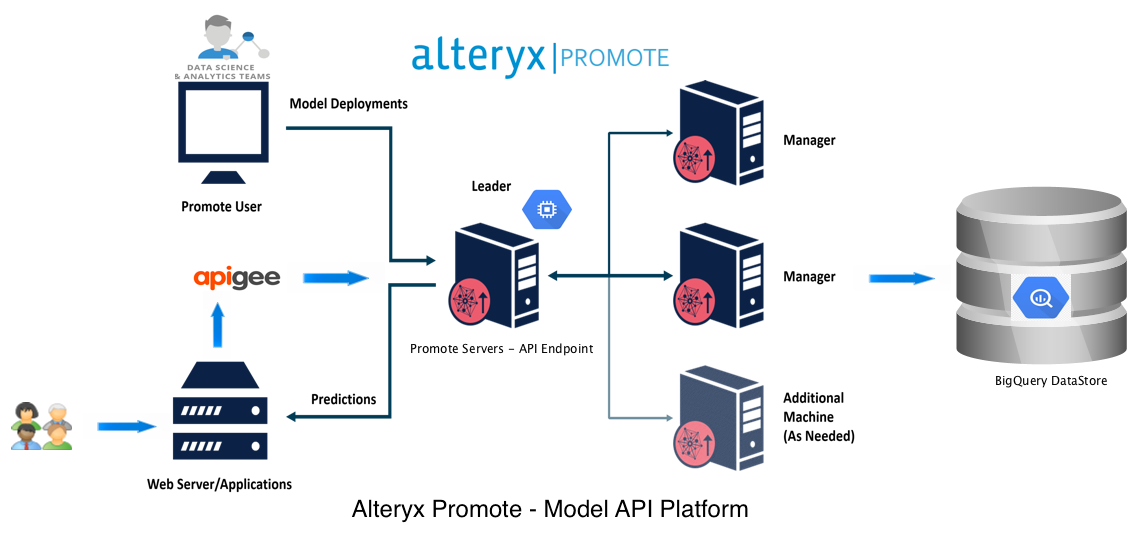

In [830]:
from IPython.display import Image
Image(filename='/users/kousik/data-scientist-v3/architecture.png')

#### High Level Technical Specification ####

I have attached the High Level Architecture above. Following are the high level technical details to operationalize a predictive model.

1. Alteryx Promote is a Model Deployment platform that allows data scientists deploy the predictive model scoring code written in statistical coding languages like R or Python directly and expose them as a REST API without needing to re-engineer code into Java or any other programming language for implementation. Rewriting an optimised statistical model from R or Python into Java takes significant amounts of time, is very expensive and error prone, and in some cases reduce the model's effectiveness. Alteryx Promote helps deploy the model code as it is without any modifications and expose as a service.
2. The REST API from Alteryx Promote gives engineers and developers the necessary code they need to embed models into real-time applications using the programming language of their choice — such as Java, PHP, .Net.  Models can even be embedded into internal systems such as Salesforce.
3. Alteryx Promote allows to send data for predictions to a predictive model in a code-free workflow environment or in a code-friendly environment. Data scientists using R or Python can also deploy custom-built models to Promote and easily make them accessible to analysts and web developers
4. First logical implementation step would be to install the Promote platform on a Kubernetes Cluster (AWS Cloud) or to install on Compute Engine cluster on Google Cloud Platform/AWS Cloud (IaaS).
5. The model can be integrated with Cloud data sources like Cloud SQL, Cloud Storage, Cloud Datastore etc. using standard packages from both R and Python. The estimated model parameters can be stored in the Cloud SQL database or in Cloud Storage.
6. The consumer application can invoke the Promote Model API using basic auth and should send the required input data as a JSON. The Promote platform upon receiving the JSON request will convert it to a structure (e.g. dataframe) that can be consumed by the model.
7. The Model outputs (Prediction, Rationale etc.) can be pushed to the Cloud Datastore or Cloud SQL database on every prediction request which can be used for Model Monitoring and tune the Model in the future.
8. The Model will send the prediction response back to the consumer application as a JSON. 
9. The Model can be integrated with any external application or other on-premise application like any other web service from the Promote platform without the need for any additional transformation.
10. In addition to model deployment Alteryx Promote provides both system-level monitoring of model-hosting infrastructure and high-availability functionality, helping organizations to monitor their infrastructure, and have confidence that their models are always up and ready to service requests for predictions in real-time.
11. We could also set up a CI/CD pipeline to deploy the code from Gitlab to the Promote Server and perform automated tests within the deployment pipeline before pushing the model code into the Promote Server for consumption.

### References ###

1. Pedregosa et al. (2011), Scikit-learn: Machine Learning in Python, JMLR 12, pp. 2825-2830
2. Claus, David. (2019). University of Oxford - Neural Networks as Classifiers. Retrieved from http://www.robots.ox.ac.uk/~dclaus/digits/neural.htm
3. Navlani, Avinash. (2019). Support Vector Machines with Scikit-learn. Retrieved from https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python